In [1]:
from waterz import agglomerate
import numpy as np

import albumentations as A
import matplotlib.pyplot as plt


import torch
import torchvision.transforms as T
import skimage

from glob import glob
from lsd.train import local_shape_descriptor
from scipy.ndimage import binary_erosion
from skimage.measure import label
from skimage.io import imread, imsave
from torch.utils.data import Dataset

import os

from celldataset_module import CellDataset3D_single
import utils_2D

from scipy import ndimage

/localscratch/conda/envs/lsd-env/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# 2d

In [12]:
input_dataset = '_GFP_max_clahe'
segmentation_dataset = '_CELL_manual'

train_dataset = utils_2D.CellDataset_single(
    image_dir='/group/jug/Enrico/TISSUE_roi_projection/training/*' + input_dataset + '.tif',
    mask_dir='/group/jug/Enrico/TISSUE_roi_projection/training/*' + segmentation_dataset + '.tif',
    crop_size=512,
    input_type='raw', output_type='boundaries',
    split='train')


train_iter = iter(train_dataset)

raw shape: (512, 512)
input shape: (1, 512, 512)


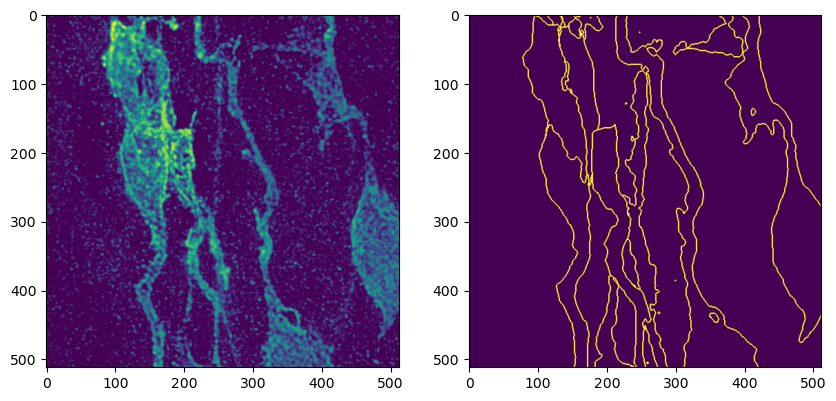

In [17]:
raw, boundaries = next(train_iter)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(raw[0])
axes[1].imshow(boundaries[0])

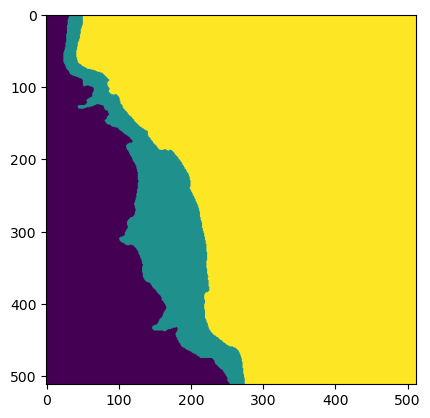

In [4]:
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
import numpy as np

# Apply watershed
labels = watershed(boundaries[0])

plt.imshow(labels)

In [ ]:
model_raw_lsd = utils_2D.model_loader('/home/enrico.negri/github/lsd_testing/output/different_sigmas/step10000_b14_c256_lr0.0001_s15/raw-lsds.pth',
                                      n_in = 1, n_out = 6)
model_lsd_bou = utils_2D.model_loader('/home/enrico.negri/github/lsd_testing/output/lsd-bound_sigmas/boundaries/step10000_b14_c256_lr0.0001_s15/lsds_pred-boundaries.pth',
                                      n_in = 6, n_out = 1)



lsd_pred = utils_2D.inference(model_raw_lsd, raw)
bou_pred = utils_2D.inference(model_lsd_bou, lsd_pred)


fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(raw[0], cmap = 'magma')
axes[1].imshow(bou_pred[0], cmap = 'magma')
axes[2].imshow(boundaries[0], cmap = 'magma')
plt.show()


lab = watershed(boundaries[0])
lab_pred = watershed(bou_pred[0])
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].imshow(lab_pred)
axes[1].imshow(lab)
plt.show()


AttributeError: Figure.set() got an unexpected keyword argument 'cmap'